In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

c:\users\sourabh.jain\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=url,cache_dir='.',untar=True)

228813984/228813984 [==============================] - 36s 0us/step


In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [8]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

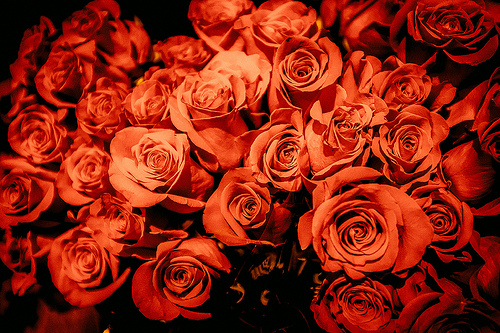

In [12]:
PIL.Image.open(str(roses[2]))

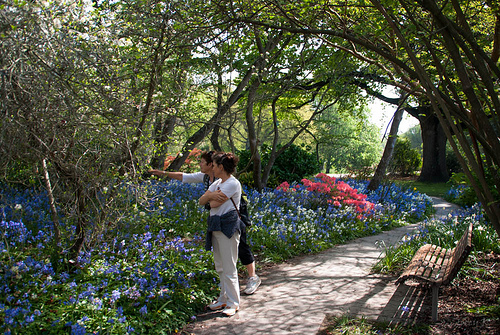

In [13]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [14]:
flower_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [15]:
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [16]:
img=cv2.imread(str(flower_image_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
x,y=[],[]

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img= cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [20]:
x=np.array(x)
y=np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)
xtrain_scaled = xtrain/255
xtest_scaled= xtest/255

In [26]:
model = keras.Sequential([
    keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,3,activation='relu',padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,activation='relu',padding='same'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])

model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(xtrain_scaled,ytrain,epochs=15)

Epoch 1/15


c:\users\sourabh.jain\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 31s 341ms/step - loss: 1.3091 - accuracy: 0.4415
Epoch 2/15
86/86 [==============================] - 29s 338ms/step - loss: 1.0106 - accuracy: 0.6010
Epoch 3/15
86/86 [==============================] - 30s 344ms/step - loss: 0.8271 - accuracy: 0.6733
Epoch 4/15
86/86 [==============================] - 30s 354ms/step - loss: 0.6435 - accuracy: 0.7565
Epoch 5/15
86/86 [==============================] - 35s 403ms/step - loss: 0.4333 - accuracy: 0.8412
Epoch 6/15
86/86 [==============================] - 35s 407ms/step - loss: 0.2477 - accuracy: 0.9248
Epoch 7/15
86/86 [==============================] - 34s 393ms/step - loss: 0.1286 - accuracy: 0.9644
Epoch 8/15
86/86 [==============================] - 31s 360ms/step - loss: 0.0824 - accuracy: 0.9717
Epoch 9/15
86/86 [==============================] - 31s 359ms/step - loss: 0.0580 - accuracy: 0.9844
Epoch 10/15
86/86 [==============================] - 31s 366ms/step - loss: 0.0405 - accuracy: 0.9891


In [27]:
model.evaluate(xtest_scaled,ytest)

29/29 [==============================] - 4s 99ms/step - loss: 1.9572 - accuracy: 0.6808


[1.9571598768234253, 0.6808279156684875]

too much overfitting

In [31]:
pred=model.predict(xtest_scaled)
pred=[np.argmax(ele) for ele in pred]
pred[:10]

29/29 [==============================] - 2s 83ms/step


[1, 0, 2, 0, 2, 3, 4, 1, 3, 0]

# Data Augmentation

In [33]:
data_augmentation= keras.Sequential([
    keras.layers.experimental.preprocessing.RandomContrast(0.5),
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

In [42]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,3,activation='relu',padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,activation='relu',padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])

model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(xtrain_scaled,ytrain,epochs=20)

Epoch 1/20
86/86 [==============================] - 58s 609ms/step - loss: 1.3052 - accuracy: 0.4302
Epoch 2/20
86/86 [==============================] - 53s 619ms/step - loss: 1.1021 - accuracy: 0.5523
Epoch 3/20
86/86 [==============================] - 53s 611ms/step - loss: 1.0157 - accuracy: 0.5952
Epoch 4/20
86/86 [==============================] - 53s 616ms/step - loss: 0.9454 - accuracy: 0.6323
Epoch 5/20
86/86 [==============================] - 53s 620ms/step - loss: 0.8913 - accuracy: 0.6592
Epoch 6/20
86/86 [==============================] - 53s 616ms/step - loss: 0.8517 - accuracy: 0.6806
Epoch 7/20
86/86 [==============================] - 53s 620ms/step - loss: 0.8040 - accuracy: 0.6831
Epoch 8/20
86/86 [==============================] - 54s 627ms/step - loss: 0.7725 - accuracy: 0.7148
Epoch 9/20
86/86 [==============================] - 53s 621ms/step - loss: 0.7668 - accuracy: 0.7104
Epoch 10/20
86/86 [==============================] - 54s 624ms/step - loss: 0.7044 - accura

In [43]:
model.evaluate(xtest_scaled,ytest)
pred=model.predict(xtest_scaled)
pred=[np.argmax(ele) for ele in pred]


29/29 [==============================] - 4s 141ms/step


In [44]:
pred[:10]

[1, 0, 2, 0, 2, 3, 4, 0, 3, 4]